## Plots

In [2]:
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
gender_votes_data="data/gender_votes.csv"
education_data="data/Education3.csv"
gender_votes_df=pd.read_csv(gender_votes_data)
education_df=pd.read_csv(education_data, engine='python')
gender_prov=gender_votes_df.groupby('Province')
total_male=gender_prov['Total_x'].sum()
total_female=gender_prov['Total_y'].sum()
gender_votes_df
sex_votes=pd.DataFrame({'Total Male':total_male,
                        'Total Female':total_female,
                             }
                            )
gender_votes_df
# Merge two dataframes using an inner join
merge_education = pd.merge(gender_votes_df, education_df , on="FED ID")
merge_education['total income'] = merge_education['Total Income_x'] + merge_education['Total Income_y']  # assigned to a column
merge_education['total population'] = merge_education['Total_x'] + merge_education['Total_y']  # assigned to a column

gender_votes_df['total income'] = gender_votes_df['Total Income_x'] + gender_votes_df['Total Income_y']  # assigned to a column
gender_votes_df['total population'] = gender_votes_df['Total_x'] + gender_votes_df['Total_y']  # assigned to a column
gender_votes_df

,Prov/Terr,FED ID,Federal Electoral Districts_x,Total_x,Total Income_x,Total_y,Total Income_y,Province,Federal Electoral Districts_y,Population,...,Valid Ballots,Percentage of Valid Ballots,Rejected Ballots,Percentage of Rejected Ballots,Total Ballots Cast,Percentage of Voter Turnout,Party Won,Party Won_count,total income,total population
0,10,10001.0,Avalon,35410,2.129874e+09,36620,1295940000,Newfoundland and Labrador,Avalon,81540,...,42086,99.6,162,0.4,42248,61.7,Liberal,Liberal,3.425814e+09,72030
1,10,10002.0,Bonavista--Burin--Trinity,32200,1.564974e+09,32720,888810000,Newfoundland and Labrador,Bonavista--Burin--Trinity,76704,...,35092,99.5,173,0.5,35265,56.5,Liberal,Liberal,2.453784e+09,64920
2,10,10003.0,Coast of Bays--Central--Notre Dame,31830,1.506208e+09,33290,951860000,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,78092,...,35448,99.6,145,0.4,35593,55.4,Liberal,Liberal,2.458068e+09,65120
3,10,10004.0,Labrador,10510,7.550630e+08,10330,414185000,Newfoundland and Labrador,Labrador,26728,...,12373,99.6,53,0.4,12426,62.0,Liberal,Liberal,1.169248e+09,20840
4,10,10005.0,Long Range Mountains,37670,1.729013e+09,39580,1185410000,Newfoundland and Labrador,Long Range Mountains,87592,...,41824,99.7,108,0.3,41932,58.3,Liberal,Liberal,2.914423e+09,77250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,59,59041.0,Victoria,45130,2.806408e+09,51740,2463542000,British Columba,Victoria,110942,...,71895,99.7,241,0.3,72136,76.2,NDP,NDP,5.269950e+09,96870
334,59,59042.0,West Vancouver--Sunshine Coast--Sea to Sky Cou...,47470,3.874496e+09,51380,2611750000,British Columba,West Vancouver--Sunshine Coast--Sea to Sky Cou...,112875,...,66458,99.7,173,0.3,66631,73.6,Liberal,Liberal,6.486246e+09,98850
335,60,60001.0,Yukon,14260,8.411790e+08,14450,729651000,Yukon,Yukon,33897,...,20291,99.5,94,0.5,20385,75.8,Liberal,Liberal,1.570830e+09,28710
336,61,61001.0,Northwest Territories,16310,1.065921e+09,15570,824421000,Northwest Territories,Northwest Territories,41462,...,18973,99.5,104,0.5,19077,63.4,Liberal,Liberal,1.890342e+09,31880


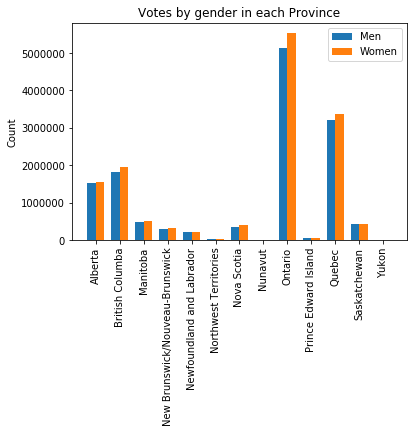

<Figure size 288x288 with 0 Axes>

In [170]:
province = sex_votes.index.tolist()
x = np.arange(len(province))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_male, width, label='Men')
rects2 = ax.bar(x + width/2, total_female, width, label='Women')

ax.set_ylabel('Count')
ax.set_title('Votes by gender in each Province')
ax.set_xticks(x)
ax.set_xticklabels(province)
ax.legend()

plt.xticks(rotation=90)

plt.savefig("./plots_img/gender_votes.png")
plt.figure(figsize=(4,4))

plt.show()

In [108]:
party_data=gender_votes_df.groupby('Party Won')
male_income=(party_data['Total Income_x'].sum())/(party_data['Total_x'].sum())
female_income=(party_data['Total Income_y'].sum())/(party_data['Total_y'].sum())
total_income=(female_income + male_income)
party_won=party_data['Party Won_count'].count()
income_party=pd.DataFrame({'Avg Male Income':male_income,
                        'Avg Female Income':female_income,
                        'Total Income Avg':total_income,
                        'Districts Won by each party':party_won
                             }
                            )
income_party


,Avg Male Income,Avg Female Income,Total Income Avg,Districts Won by each party
Party Won,,,,
Bloc Québécois,50582.575236,34230.622952,84813.198188,10
Conservative,60078.966823,39137.318535,99216.285359,99
Green Party,62166.816568,46104.644290,108271.460858,1
Liberal,56187.838122,39249.607199,95437.445322,184
NDP,50012.805079,35239.894899,85252.699977,44


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

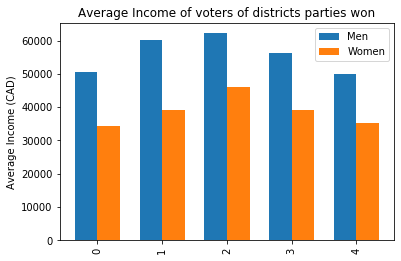

In [169]:
party_name = income_party.index.tolist()
x = np.arange(len(party_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_income, width, label='Men')
rects2 = ax.bar(x + width/2, female_income, width, label='Women')

ax.set_ylabel('Average Income (CAD)')
ax.set_title('Average Income of voters of districts parties won')
ax.set_xticks(x)
ax.set_xticklabels(party_name)
ax.legend()

plt.savefig("./plots_img/avg_income.png")
plt.xticks(rotation=90)



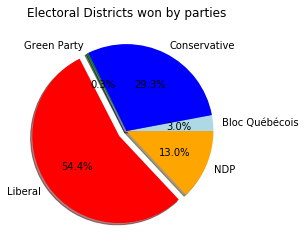

In [168]:
party_pyplot=(gender_votes_df.groupby(["Party Won"])["Party Won_count"].count()).tolist()
colors = ["lightblue", "blue","green","red","orange"]
labels=['Bloc Québécois','Conservative','Green Party','Liberal','NDP']
explode = (0, 0, 0, 0.1, 0)
plt.title('Electoral Districts won by parties')
plt.pie(party_pyplot, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.savefig("./plots_img/party_pie.png")
plt.show()

In [6]:
merge_education

,Prov/Terr,FED ID,Federal Electoral Districts_x_x,Total_x,Total Income_x,Total_y,Total Income_y,Province,Federal Electoral Districts_y,Population,...,xSecondary School Diploma.1,xUniversity level or above,ï»¿Province,Party Won_y,No Certificate,Secondary School Diploma,Non-university certificate or diploma,University level or above,total income,total population
0,10,10001.0,Avalon,35410,2.129874e+09,36620,1295940000,Newfoundland and Labrador,Avalon,81540,...,0.33,0.17,Newfoundland and Labrador,Liberal,21,29,33,17,3.425814e+09,72030
1,10,10002.0,Bonavista--Burin--Trinity,32200,1.564974e+09,32720,888810000,Newfoundland and Labrador,Bonavista--Burin--Trinity,76704,...,0.27,0.08,Newfoundland and Labrador,Liberal,35,30,27,8,2.453784e+09,64920
2,10,10003.0,Coast of Bays--Central--Notre Dame,31830,1.506208e+09,33290,951860000,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,78092,...,0.25,0.10,Newfoundland and Labrador,Liberal,34,30,25,10,2.458068e+09,65120
3,10,10004.0,Labrador,10510,7.550630e+08,10330,414185000,Newfoundland and Labrador,Labrador,26728,...,0.31,0.13,Newfoundland and Labrador,Liberal,30,26,31,13,1.169248e+09,20840
4,10,10005.0,Long Range Mountains,37670,1.729013e+09,39580,1185410000,Newfoundland and Labrador,Long Range Mountains,87592,...,0.27,0.13,Newfoundland and Labrador,Liberal,31,29,27,13,2.914423e+09,77250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,59,59040.0,Vancouver South,39970,1.695200e+09,44530,1472797000,British Columba,Vancouver South,100966,...,0.20,0.28,British Columba,Liberal,23,29,20,28,3.167997e+09,84500
333,59,59041.0,Victoria,45130,2.806408e+09,51740,2463542000,British Columba,Victoria,110942,...,0.22,0.27,British Columba,NDP,24,27,22,27,5.269950e+09,96870
334,59,59042.0,West Vancouver--Sunshine Coast--Sea to Sky Cou...,47470,3.874496e+09,51380,2611750000,British Columba,West Vancouver--Sunshine Coast--Sea to Sky Cou...,112875,...,0.14,0.56,British Columba,Liberal,8,22,14,56,6.486246e+09,98850
335,61,61001.0,Northwest Territories,16310,1.065921e+09,15570,824421000,Northwest Territories,Northwest Territories,41462,...,0.18,0.55,Northwest Territories,Liberal,9,18,18,55,1.890342e+09,31880


In [9]:
NDP_ed =merge_education.loc[merge_education["Party Won_y"] == "NDP", :]
liberal_ed=merge_education.loc[merge_education["Party Won_y"] == "Liberal", :]
green_ed=merge_education.loc[merge_education["Party Won_y"] == "Green Party", :]
conservative_ed=merge_education.loc[merge_education["Party Won_y"] == "Conservative", :]
bloc_ed=merge_education.loc[merge_education["Party Won_y"] == "Bloc Québécois", :]

NDP_ed

,Prov/Terr,FED ID,Federal Electoral Districts_x_x,Total_x,Total Income_x,Total_y,Total Income_y,Province,Federal Electoral Districts_y,Population,...,xSecondary School Diploma.1,xUniversity level or above,ï»¿Province,Party Won_y,No Certificate,Secondary School Diploma,Non-university certificate or diploma,University level or above,total income,total population
32,24,24001.0,Abitibi--Baie-James--Nunavik--Eeyou,31320,1.563287e+09,31510,908783000,Quebec,Abitibi--Baie-James--Nunavik--Eeyou,85475,...,0.18,0.13,Quebec,NDP,47,23,18,13,2.472070e+09,62830
33,24,24002.0,Abitibi--T�miscamingue,42100,2.233822e+09,41750,1319401000,Quebec,Abitibi--Témiscamingue,102794,...,0.21,0.17,Quebec,NDP,36,26,21,17,3.553223e+09,83850
42,24,24011.0,Beloeil--Chambly,45310,2.761591e+09,47750,1968773000,Quebec,Beloeil--Chambly,109955,...,0.26,0.28,Quebec,NDP,19,27,26,28,4.730364e+09,93060
43,24,24012.0,Berthier--Maskinong�,43620,1.874082e+09,43010,1254367000,Quebec,Berthier--Maskinongé,98590,...,0.23,0.13,Quebec,NDP,34,30,23,13,3.128449e+09,86630
49,24,24018.0,Rimouski-Neigette--T�miscouata--Les Basques,34800,1.513577e+09,36800,1192777000,Quebec,Rimouski-Neigette--Témiscouata--Les Basques,84809,...,0.24,0.15,Quebec,NDP,30,31,24,15,2.706354e+09,71600
56,24,24025.0,Drummond,41260,1.786120e+09,42260,1273661000,Quebec,Drummond,98681,...,0.24,0.15,Quebec,NDP,31,29,24,15,3.059781e+09,83520
59,24,24028.0,Hochelaga,41300,1.694269e+09,42720,1422959000,Quebec,Hochelaga,103436,...,0.22,0.35,Quebec,NDP,20,23,22,35,3.117228e+09,84020
63,24,24032.0,Jonqui�re,36660,1.852569e+09,36650,1157252000,Quebec,Jonquière,87596,...,0.31,0.20,Quebec,NDP,24,26,31,20,3.009821e+09,73310
70,24,24039.0,Laurier--Sainte-Marie,49940,2.355967e+09,42930,1604110000,Quebec,Laurier--Sainte-Marie,107034,...,0.18,0.56,Quebec,NDP,10,17,18,56,3.960077e+09,92870
74,24,24043.0,Longueuil--Saint-Hubert,41660,2.156065e+09,46260,1725405000,Quebec,Longueuil--Saint-Hubert,104366,...,0.23,0.29,Quebec,NDP,22,26,23,29,3.881470e+09,87920


In [ ]:
ay=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'')

NDP_ed.plot(kind='scatter', x='total population', y='total income',
        color='Orange', label='NDP', ay=ay)

plt.savefig("./plots_img/NDP.png")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

In [11]:
NDP_df =gender_votes_df.loc[gender_votes_df["Party Won"] == "NDP", :]
liberal_df=gender_votes_df.loc[gender_votes_df["Party Won"] == "Liberal", :]
green_df=gender_votes_df.loc[gender_votes_df["Party Won"] == "Green Party", :]
conservative_df=gender_votes_df.loc[gender_votes_df["Party Won"] == "Conservative", :]
bloc_df=gender_votes_df.loc[gender_votes_df["Party Won"] == "Bloc Québécois", :]

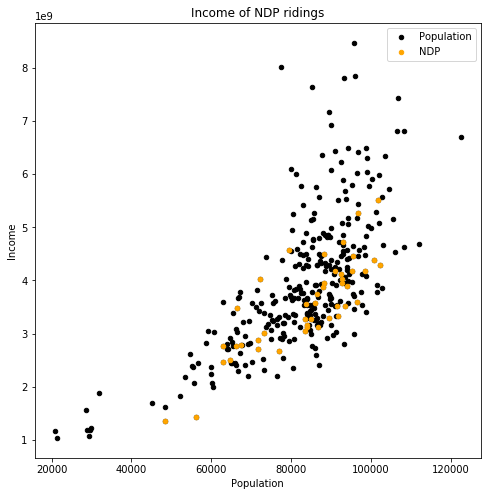

In [12]:
ax=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'Income of NDP ridings')

NDP_df.plot(kind='scatter', x='total population', y='total income',
        color='Orange', label='NDP', ax=ax)

plt.savefig("./plots_img/NDP.png")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

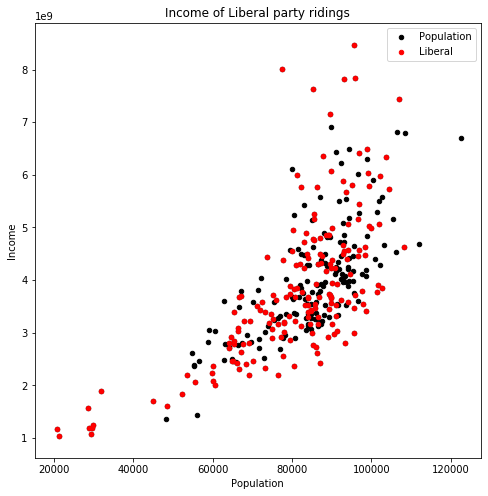

In [13]:
ax1=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'Income of Liberal party ridings')

liberal_df.plot(kind='scatter', x='total population', y='total income',
        color='red', label='Liberal', ax=ax1)
plt.savefig("./plots_img/Liberal.png")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

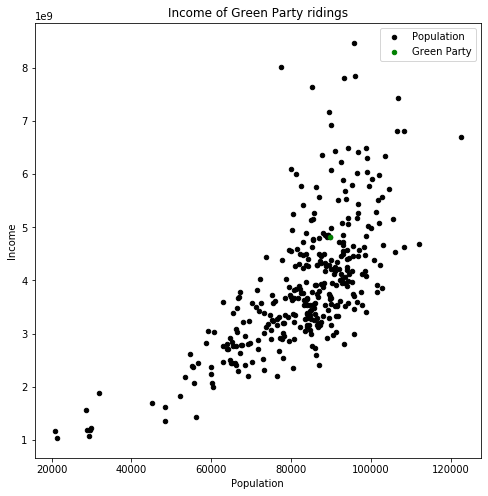

In [14]:
ax2=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'Income of Green Party ridings')


green_df.plot(kind='scatter', x='total population', y='total income',
        color='green', label='Green Party', ax=ax2)

plt.savefig("./plots_img/green.png")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

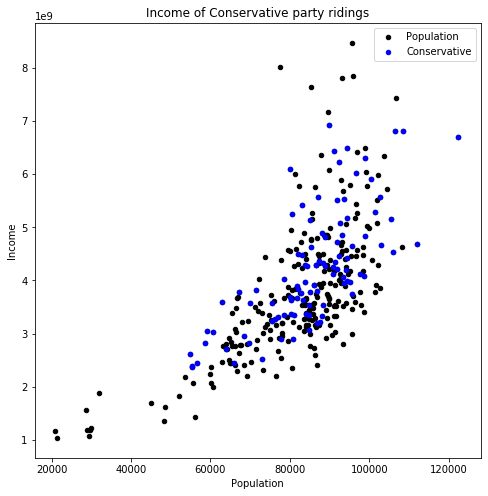

In [15]:
ax3=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'Income of Conservative party ridings')
conservative_df.plot(kind='scatter', x='total population', y='total income',
        color='blue', label='Conservative', ax=ax3)
plt.savefig("./plots_img/conservative.png")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

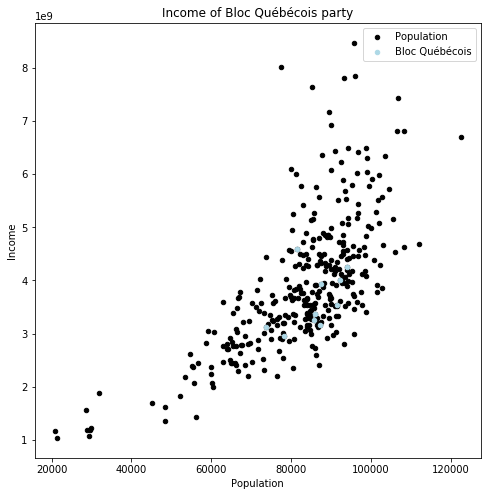

In [17]:
ax4=gender_votes_df.plot(kind='scatter', x='total population', y='total income', label='Population', color='black', grid=True, figsize=(8,8),
              title=f'Income of Bloc Québécois party')
bloc_df.plot(kind='scatter', x='total population', y='total income',
        color='lightblue', label='Bloc Québécois', ax=ax4)
plt.savefig("./plots_img/bloc.png", transparent=True)
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()